In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import glob

In [1]:
def split_8(img):
    borne = np.linspace(0,4096,9).astype('int')
    images = []
    for i in range(1,len(borne)):
        for j in range(1,len(borne)):
            image = img[borne[i-1]:borne[i],borne[j-1]:borne[j]]
            images.append(image)
    return np.array(images)

In [4]:
img = cv2.imread("2.tif")
img = cv2.resize(img,(4096,4096))

img.shape

(4096, 4096, 3)

In [31]:
imgs = []

for i in range(2,16):
    try:
        filename = "{}.tif".format(str(i))
        img = cv2.imread(filename)
        img = cv2.resize(img,(4096,4096))
        img = split_8(img)
        imgs.append(img)
    except:
        continue


imgs = np.array(imgs)
imgs.shape

(14, 64, 512, 512, 3)

In [32]:
imgs[imgs == 3] = 3
imgs[imgs == 4] = 0
imgs[imgs == 5] = 4
imgs[imgs == 6] = 5
imgs[imgs == 7] = 6
imgs[imgs == 8] = 5
imgs[imgs == 9] = 5
imgs[imgs == 10] = 7
imgs[imgs == 11] = 8
imgs[imgs == 12] = 9
imgs[imgs == 13] = 0
imgs[imgs == 14] = 10

In [33]:
labels = imgs.flatten().reshape(896,512,512,3)

In [34]:
CLASSES = {0: falaise , 1: batiment, 2:route,3:pierrier,4:verger,
5:champ,6:prairie,7:foret,8:foret_claire,9:buisson,10:eau}

SIZE = (512,512,3)

    - 0: falaise 0 

    - 1: batiment 1

    - 2: route 2
 
    - 3: pierrier 3

    - 4: falaise? 0

    - 5: verger 4

    - 6: champs 5

    - 7: Prairie 6

    - 8: champs 5

    - 9: champs 5

    - 10: forets 7

    - 11: foret claires 8

    - 12: buisson 9

    - 13: falaise 0 

    - 14: eau 10

In [11]:
def read(glob_name):
    paths = glob.glob("synthese/"+glob_name+"*")
    imgs = []
    for path in paths:
        img = cv2.imread(path)
        
        img1 = img[:512,:512]
        imgs.append(img1)

        img2 = img[:512,512:]
        imgs.append(img2)

        img3 = img[512:,:512]
        imgs.append(img3)

        img4 = img[512:,512:]
        imgs.append(img4)

    return np.array(imgs)

falaise = read("falaise")
batiment = read("batiment")
route = read("route")
pierrier = read("pierrier")
verger = read("verger")
champ = read("champ")
prairie = read("prairie")
foret = read("foret_")
foret_claire = read("foretclaire")
buisson = read("buisson")
eau = read("eau")

In [12]:
import random

In [35]:
global_id = 0

def random_choice():
    falaise_id = random.choice(range(len(falaise)))
    batiment_id = random.choice(range(len(batiment)))
    route_id = random.choice(range(len(route)))
    pierrier_id = random.choice(range(len(pierrier)))
    verger_id = random.choice(range(len(verger)))
    champs_id = random.choice(range(len(champ)))
    prairie_id = random.choice(range(len(prairie)))
    foret_id = random.choice(range(len(foret)))
    foret_claire_id = random.choice(range(len(foret_claire)))
    buisson_id = random.choice(range(len(buisson)))
    eau_id = random.choice(range(len(eau)))

    return [falaise_id,batiment_id,route_id,pierrier_id,verger_id,
    champs_id,prairie_id,foret_id,foret_claire_id,buisson_id,eau_id]

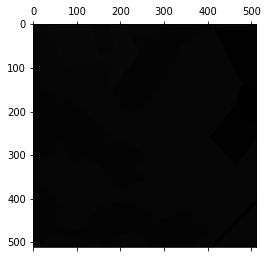

In [17]:
plt.matshow(labels[0])
plt.show()

[2, 3, 2, 2, 2, 3, 2, 4, 4, 1, 3]
1


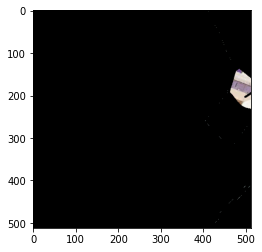

2


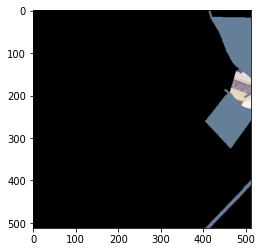

3


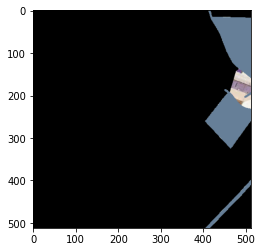

4


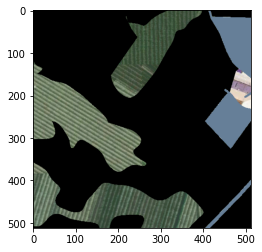

5


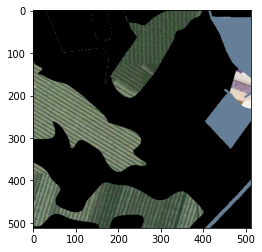

6


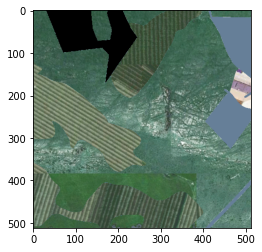

7


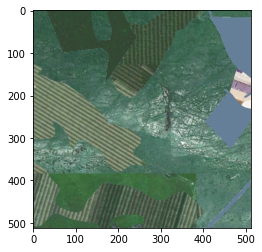

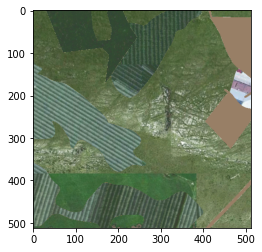

In [40]:
    # on garde trace de toutes les classes présentes sur la carte
    unique = np.unique(labels[0])
    # on va tirer au hasard une image label pour chaque classe
    random_choic = random_choice()
    print(random_choic)

    result = np.zeros(SIZE, dtype=np.uint8)


    first_class_idx = unique[0]
    classe_data = CLASSES[first_class_idx]

    image = classe_data[random_choic[first_class_idx]]
    mask = np.zeros(SIZE, dtype=np.uint8)
    mask[labels[0] == first_class_idx] = 255

    result_tmp = cv2.bitwise_and(image, mask)
    result = result_tmp


    for i in unique[1:]:
        classe_data = CLASSES[i]
        print(i)
        classe_img = classe_data[random_choic[i]]
        
        mask = np.zeros(SIZE, dtype=np.uint8)
        mask[labels[0] == i] = 255

        result_tmp = cv2.bitwise_and(classe_img, mask)
        result = cv2.bitwise_or(result,result_tmp)

    plt.imshow(result[...,::-1])
    plt.show()

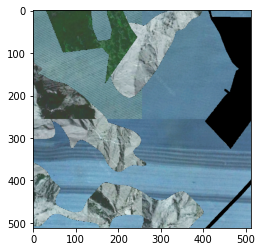

In [23]:
image = falaise[0]
mask = np.zeros(image.shape, dtype=np.uint8)
mask[labels[0] == 4] = 255

result_tmp = cv2.bitwise_and(image, mask)
result = result_tmp

image = champ[0]
mask = np.zeros(image.shape, dtype=np.uint8)
mask[labels[0] == 6] = 255

result_tmp = cv2.bitwise_and(image, mask)
result = cv2.bitwise_or(result,result_tmp)

image = foret[0]
mask = np.zeros(image.shape, dtype=np.uint8)
mask[labels[0] == 8] = 255

result_tmp = cv2.bitwise_and(image, mask)
result = cv2.bitwise_or(result,result_tmp)

plt.imshow(result)
plt.show()

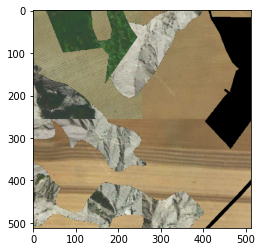

In [165]:
im = cv2.bitwise_or(result,result1)
im = cv2.bitwise_or(im,result2)

plt.imshow(im[...,::-1])

In [166]:
np.unique(labels[0])

array([0, 1, 2, 3, 4, 5, 6, 8], dtype=uint8)

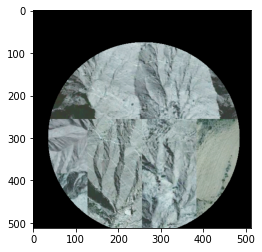

In [145]:
import cv2
import numpy as np

# Load image, create mask, and draw white circle on mask
image = falaise[0]
mask = np.zeros(image.shape, dtype=np.uint8)
mask = cv2.circle(mask, (260, 300), 225, (255,255,255), -1) 

# Mask input image with binary mask
result = cv2.bitwise_and(image, mask)
# Color background white

plt.imshow(result)